<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/DeepCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = torch.device( "cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Dataset , transforms and visulisations

In [ ]:
transform_train = transforms.Compose([
                      transforms.RandomResizedCrop(224),
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                      ])

transform_test = transforms.Compose([
                      transforms.RandomResizedCrop(224),
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                      ])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data' , train=True , download=True , transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data' , train=False , download=True , transform=transform_test)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
num_classes = 10
batch_size  = 4

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size , shuffle=True )

In [ ]:
dataiter = iter( trainloader )
images , labels = dataiter.next()

print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [ ]:
def imshow(img, title):
  npimg = img.numpy() / 2 + 0.5
  plt.figure(figsize= (batch_size , 1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg , (1,2,0)))
  plt.title(title)
  plt.show()

In [ ]:
def show_batch_images(dataloader):
  images , labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title = [ str(x.item())  for x in labels])

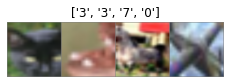

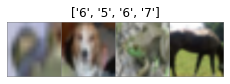

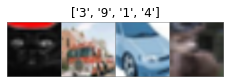

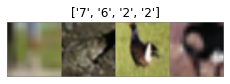

In [ ]:
for i in range(4):
  show_batch_images(trainloader)

VGG-16

In [ ]:
from torchvision import models

In [ ]:
vgg = models.vgg16_bn() # bn = batch_normalization

In [ ]:
print( vgg )

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
print( vgg.features[0] )

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
print( vgg.classifier[6] )

Linear(in_features=4096, out_features=1000, bias=True)


In [ ]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features , num_classes)])
print( mod_classifier )

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [ ]:
vgg.classifier = nn.Sequential( *mod_classifier )
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

**Train CIFAR10**

In [ ]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size , shuffle=True )
testloader = torch.utils.data.DataLoader(testset , batch_size=batch_size , shuffle=False )

In [ ]:
def evalution( dataloader , model ):
  correct , total = 0 , 0 
  for data in dataloader:
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)
    outputs = model( inputs )
    _ , pred = torch.max( outputs.data , 1 )
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  return ( 100 * correct ) / total 

In [ ]:
vgg = vgg.to( device )
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD( vgg.parameters() , lr = 0.05 )

In [ ]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil( 50000 / batch_size )

In [ ]:
for epoch in range(max_epochs):
  for i,data in enumerate( trainloader ):
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)

    opt.zero_grad()
    outputs = vgg( inputs )
    loss = loss_fn( outputs , labels )
    loss.backward()
    opt.step()

    del inputs , labels , outputs
    torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())
    if i % 100 == 0:
      print( "Iteration %d / %d , loss : %0.2f"  %(i , n_iters , loss.item()))
  print( "Epoch %d / %d , Trai_acc : %0.2f , Test_acc : %0.2f"  %(epoch , n_iters , evalution(trainloader , vgg) , evalution(testloader , vgg)) )

plt.plot( loss_epoch_arr )
plt.show()

Iteration 0 / 3125 , loss : 2.41
Epoch 0 / 3125 , Test_acc : 10.00 , Train_acc : 10.01
Iteration 100 / 3125 , loss : 2.97
Epoch 100 / 3125 , Test_acc : 13.13 , Train_acc : 13.55
Iteration 200 / 3125 , loss : 2.47
Epoch 200 / 3125 , Test_acc : 10.48 , Train_acc : 9.84
Iteration 300 / 3125 , loss : 2.42
Epoch 300 / 3125 , Test_acc : 11.95 , Train_acc : 12.22
Iteration 400 / 3125 , loss : 2.16
Epoch 400 / 3125 , Test_acc : 13.14 , Train_acc : 12.84
Iteration 500 / 3125 , loss : 2.19
Epoch 500 / 3125 , Test_acc : 12.65 , Train_acc : 12.30
Iteration 600 / 3125 , loss : 2.35
Epoch 600 / 3125 , Test_acc : 12.41 , Train_acc : 12.64
Iteration 700 / 3125 , loss : 2.59
Epoch 700 / 3125 , Test_acc : 12.84 , Train_acc : 12.83
Iteration 800 / 3125 , loss : 2.29
Epoch 800 / 3125 , Test_acc : 12.58 , Train_acc : 12.65
Iteration 900 / 3125 , loss : 2.29


KeyboardInterrupt: ignored

**Freeze layers of convolutional operations**

In [ ]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size , shuffle=True )
testloader = torch.utils.data.DataLoader(testset , batch_size=batch_size , shuffle=False )

In [ ]:
vgg = models.vgg16_bn( pretrained=True ) # bn = batch_normalization

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [ ]:
for param in vgg.parameters():
  param.requires_grad = False

In [ ]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear( final_in_features , num_classes )

In [ ]:
vgg = vgg.to( device )
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD( vgg.parameters() , lr = 0.05 )

**Copy the checkpointing**

minimum loss : 2
Iteration 0 / 3125 , loss : 2.47
minimum loss : 2
minimum loss : 2
minimum loss : 1
minimum loss : 1
minimum loss : 1
minimum loss : 1
minimum loss : 1
Iteration 100 / 3125 , loss : 2.58
minimum loss : 1
minimum loss : 1
minimum loss : 0
minimum loss : 0
Iteration 200 / 3125 , loss : 1.58
minimum loss : 0
Iteration 300 / 3125 , loss : 1.87
minimum loss : 0
Iteration 400 / 3125 , loss : 1.78
minimum loss : 0
Iteration 500 / 3125 , loss : 1.78
Iteration 600 / 3125 , loss : 2.92
Iteration 700 / 3125 , loss : 2.65
Iteration 800 / 3125 , loss : 2.38
Iteration 900 / 3125 , loss : 2.88
Iteration 1000 / 3125 , loss : 1.52
Iteration 1100 / 3125 , loss : 2.37
Iteration 1200 / 3125 , loss : 3.39
Iteration 1300 / 3125 , loss : 2.14
Iteration 1400 / 3125 , loss : 3.89
Iteration 1500 / 3125 , loss : 2.54
Iteration 1600 / 3125 , loss : 2.05
Iteration 1700 / 3125 , loss : 2.79
Iteration 1800 / 3125 , loss : 3.04
Iteration 1900 / 3125 , loss : 1.62
Iteration 2000 / 3125 , loss : 2.03
I

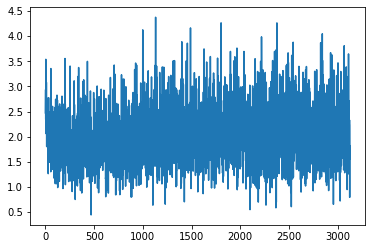

In [ ]:
import copy

loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil( 50000 / batch_size )

min_loss = 1000

for epoch in range(max_epochs):
  for i,data in enumerate( trainloader ):
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)

    opt.zero_grad()
    outputs = vgg( inputs )
    loss = loss_fn( outputs , labels )
    loss.backward()
    opt.step()

    del inputs , labels , outputs
    torch.cuda.empty_cache()
    
    if min_loss > loss.item() :
      min_loss = loss.item()
      best_model = copy.deepcopy( vgg.state_dict() )
      print("minimum loss : %d" % (min_loss))
    loss_epoch_arr.append(loss.item())
    if i % 100 == 0:
      print( "Iteration %d / %d , loss : %0.2f"  %(i , n_iters , loss.item()))
  print( "Epoch %d / %d , Test_acc : %0.2f , Train_acc : %0.2f"  %(epoch , n_iters , evalution(trainloader , vgg) , evalution(testloader , vgg)) )

plt.plot( loss_epoch_arr )
plt.show()

In [ ]:
vgg.load_state_dict( best_model )
print(evalution(trainloader , vgg) , evalution(testloader , vgg) )

45.146 44.84


**ResNet Model**

In [ ]:
resnet = models.resnet18( pretrained = True )

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
print( resnet )

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in resnet.parameters():
  param.requires_grad = False

In [ ]:
final_in_features = resnet.fc.in_features
resnet.fc = nn.Linear( final_in_features , num_classes )

In [ ]:
resnet = resnet.to( device )
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD( resnet.parameters() , lr = 0.01 )

minimum loss : 1
Iteration 0 / 3125 , loss : 1.34
minimum loss : 0
minimum loss : 0
minimum loss : 0
Iteration 100 / 3125 , loss : 1.49
Iteration 200 / 3125 , loss : 1.15
Iteration 300 / 3125 , loss : 1.19
minimum loss : 0
Iteration 400 / 3125 , loss : 1.08
Iteration 500 / 3125 , loss : 1.19
Iteration 600 / 3125 , loss : 1.92
Iteration 700 / 3125 , loss : 0.57
Iteration 800 / 3125 , loss : 1.36
Iteration 900 / 3125 , loss : 1.46
Iteration 1000 / 3125 , loss : 1.39
Iteration 1100 / 3125 , loss : 1.21
minimum loss : 0
Iteration 1200 / 3125 , loss : 1.34
minimum loss : 0
Iteration 1300 / 3125 , loss : 0.78
Iteration 1400 / 3125 , loss : 1.42
Iteration 1500 / 3125 , loss : 1.09
Iteration 1600 / 3125 , loss : 1.18
Iteration 1700 / 3125 , loss : 1.21
Iteration 1800 / 3125 , loss : 1.14
minimum loss : 0
Iteration 1900 / 3125 , loss : 0.79
Iteration 2000 / 3125 , loss : 1.31
minimum loss : 0
Iteration 2100 / 3125 , loss : 0.41
Iteration 2200 / 3125 , loss : 1.40
Iteration 2300 / 3125 , loss : 

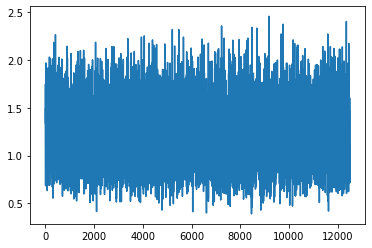

In [ ]:
loss_epoch_arr = []
max_epochs = 4

n_iters = np.ceil( 50000 / batch_size )

min_loss = 1000

for epoch in range( max_epochs ):
  for i,data in enumerate( trainloader ):
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)

    opt.zero_grad()
    outputs = resnet( inputs )
    loss = loss_fn( outputs , labels )
    loss.backward()
    opt.step()

    del inputs , labels , outputs
    torch.cuda.empty_cache()
    
    if min_loss > loss.item() :
      min_loss = loss.item()
      best_model = copy.deepcopy( resnet.state_dict() )
      print("minimum loss : %d" % (min_loss))
    loss_epoch_arr.append(loss.item())
    if i % 100 == 0:
      print( "Iteration %d / %d , loss : %0.2f"  %(i , n_iters , loss.item()))
  print( "Epoch %d / %d , Test_acc : %0.2f , Train_acc : %0.2f"  %(epoch , n_iters , evalution(trainloader , resnet) , evalution(testloader , resnet)) )

plt.plot( loss_epoch_arr )
plt.show()

In [ ]:
resnet.load_state_dict( best_model )
print(evalution(trainloader , resnet) , evalution(testloader , resnet) )

58.442 57.51


**Inception Model**

In [ ]:
inception = models.inception_v3(pretrained=True)
print( inception )

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth



Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), str

In [ ]:
aux_in_features = inception.AuxLogits.fc.in_features
num_classes = 10
inception.AuxLogits.fc = nn.Linear( aux_in_features , num_classes )

In [ ]:
final_in_features = inception.fc.in_features
inception.fc = nn.Linear( final_in_features , num_classes )

In [ ]:
transform_train = transforms.Compose([
                      transforms.RandomResizedCrop(299),
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                      ])

transform_test = transforms.Compose([
                      transforms.RandomResizedCrop(299),
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                      ])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data' , train=True , download=True , transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data' , train=False , download=True , transform=transform_test)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
def evalution_inception( dataloader , model ):
  correct , total = 0 , 0 
  for data in dataloader:
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)
    outputs , aux_outputs = model( inputs )
    _ , pred = torch.max( outputs.data , 1 )
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  return ( 100 * correct ) / total 

In [ ]:
inception = inception.to( device )
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD( inception.parameters() , lr = 0.01 )

In [ ]:
import copy
loss_epoch_arr = []
max_epochs = 4
batch_size = 16
n_iters = np.ceil( 50000 / batch_size )

min_loss = 1000

for epoch in range(max_epochs):
  for i,data in enumerate( trainloader ):
    inputs , labels = data
    inputs , labels = inputs.to(device) , labels.to(device)

    opt.zero_grad()
    outputs , aux_outputs = inception( inputs )
    loss = loss_fn( outputs , labels ) + 0.4 * loss_fn( aux_outputs , labels )
    loss.backward()
    opt.step()

    del inputs , labels , outputs
    torch.cuda.empty_cache()
    
    if min_loss > loss.item() :
      min_loss = loss.item()
      best_model = copy.deepcopy( inception.state_dict() )
      print("minimum loss : %d" % (min_loss))
    loss_epoch_arr.append(loss.item())
    if i % 100 == 0:
      print( "Iteration %d / %d , loss : %0.2f"  %(i , n_iters , loss.item()))
  print( "Epoch %d / %d , Test_acc : %0.2f , Train_acc : %0.2f"  %(epoch , n_iters , evalution_inception(trainloader , inception) , evalution_inception(testloader , inception)) )

plt.plot( loss_epoch_arr )
plt.show()

minimum loss : 3
Iteration 0 / 3125 , loss : 3.53
minimum loss : 3
minimum loss : 3
minimum loss : 3
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
minimum loss : 2
Iteration 100 / 3125 , loss : 2.22
minimum loss : 2
minimum loss : 2
minimum loss : 1
minimum loss : 1
minimum loss : 1
minimum loss : 1
Iteration 200 / 3125 , loss : 1.78
minimum loss : 1
minimum loss : 1
minimum loss : 1
Iteration 300 / 3125 , loss : 1.56
minimum loss : 1
minimum loss : 1
minimum loss : 1
Iteration 400 / 3125 , loss : 1.97
minimum loss : 0
minimum loss : 0
minimum loss : 0
Iteration 500 / 3125 , loss : 1.59
Iteration 600 / 3125 , loss : 1.22
minimum loss : 0
minimum loss : 0
Iteration 700 / 3125 , loss : 2.29
minimum loss : 0
minimum loss : 0
Iteration 800 / 3125 , loss : 1.40
Iteration 900 / 3125 , loss : 1.03
minimum loss : 0
Iteration 1000 / 3125 , loss : 1.24
Iteration 1100 / 3125 , loss : 1.31
Iteration 1200 / 31

NameError: ignored